<a href="https://colab.research.google.com/github/JeChukwubuikem/JeChukwubuikem/blob/main/Prediction_of_University_Enrollment_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **University Enrollment Trend**


**Data Validation**

The dataset contains 1850 rows and 8 columns. there were missing values in few columns before cleaning. The columns was validated against the criteria in the dataset.

- Course_id: no missing Values, converted to **object** datatype
- course_type: Same data type as the description No missing  values
- year: Same as the description no missing values
- enrollment_count: Same as the description No missing values
- pre_score: contain a **130** rows of **'-'** as a missing value, I replaced it with 0 and converted it to **float** datatype.
- post_score: **185** values so I replaced it with **0**.
- pre_requirement: Encountered **89** missing values which I replaced with a **None**
- department: contains 4 different categories, No missing value.


In [64]:
#import basic libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

#read the csv file
u_enroll = pd.read_csv('/content/university_enrollment_2306.csv')
u_enroll.head(10)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.1,76.0,Beginner,Math
6,7,online,2021,241,87.83,84.0,Beginner,Science
7,8,online,2018,261,76.48,88.0,None,Technology
8,9,online,2019,261,83.97,87.0,None,Technology
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering


In [44]:
u_enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [45]:
#validate any negative values in numeric variables
u_enroll.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


In [46]:
#perform value counts of each column and print 5 rows of each column
for col in u_enroll.columns[1:]:
    col_info = u_enroll[col].value_counts(dropna= False)
    print(col_info.iloc[:5])

online       1375
classroom     475
Name: course_type, dtype: int64
2013    169
2012    164
2016    162
2015    160
2021    159
Name: year, dtype: int64
261    444
251    276
256    169
241    137
246    112
Name: enrollment_count, dtype: int64
-        130
12.11      3
51.95      3
18.01      3
23.66      3
Name: pre_score, dtype: int64
NaN     185
72.0     82
76.0     78
79.0     77
73.0     74
Name: post_score, dtype: int64
None            802
Beginner        654
Intermediate    305
NaN              89
Name: pre_requirement, dtype: int64
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: department, dtype: int64


**Checking for missing values**

In [47]:
# get the sum of missing values in each column
u_enroll.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

### **Handling missing values and datatytpe**

Replacing with columns with missing values **pre_score, post_score and pre_requirement** with **0, 0 and Non**e respectively

In [48]:
#replace '-' with a NaN
u_enroll['pre_score'].replace('-', np.nan, inplace= True)
u_enroll['pre_score'].fillna(0, inplace= True)
u_enroll['post_score'].fillna(0, inplace= True)
u_enroll['pre_requirement'].fillna('None', inplace= True)

#convert datatype of 'pre_score'
u_enroll['course_id'] = u_enroll['course_id'].astype('object')
u_enroll['pre_score'] = u_enroll['pre_score'].astype('float')

u_enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 115.8+ KB


## **Exploratory Data Analysis**

**Distribution of enrollment_counts**

the Histogram below shows the distribution of enrollment count for each year and class type ranges between 154 to 190 and 190 to 267 to further prove this, lets plot a line plot of year and enrollment_count filtered by class type

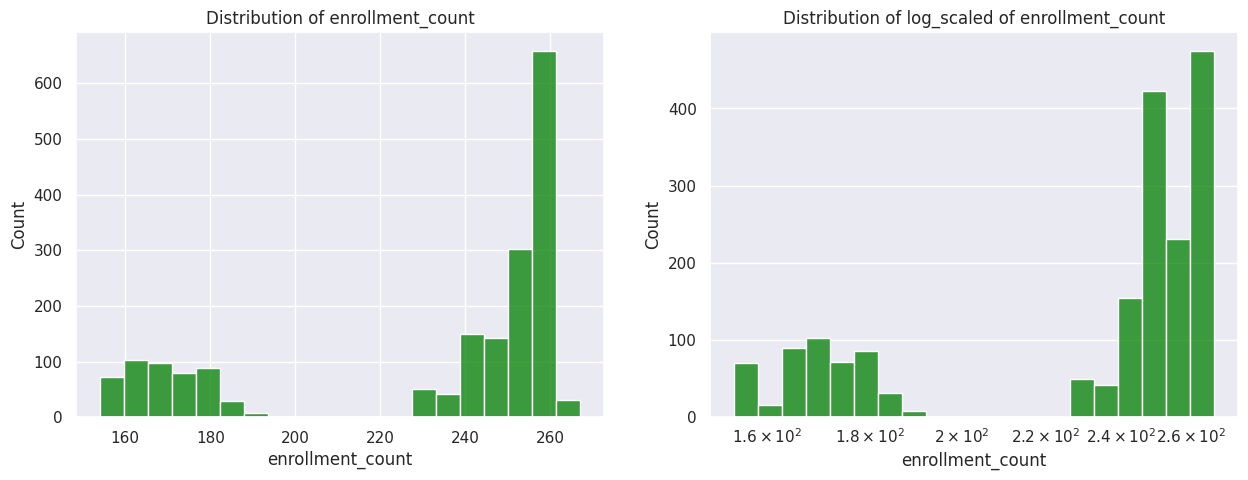

In [49]:
sns.set_palette("RdBu")
sns.set_theme()
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(data= u_enroll, x= 'enrollment_count',bins=20, color='green', ax=axes[0]).set(title= 'Distribution of enrollment_count')
sns.histplot(data= u_enroll, x= 'enrollment_count', log_scale=True, bins=20, color='green', ax=axes[1]).set(title= 'Distribution of log_scaled of enrollment_count')
plt.show()

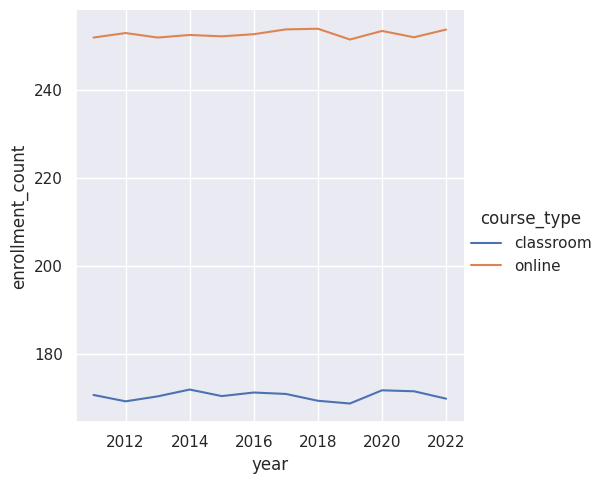

In [50]:
#plot of year and enrollment counts by course_type
sns.relplot(data= u_enroll, x= 'year', y= 'enrollment_count', kind='line', hue= 'course_type', errorbar= None)
plt.show()

**The line graph above shows that Online course type has high enrollment every year**

Lets visualize the plot of year and enrollment count of the individual class type to further see the number of enrollment per year

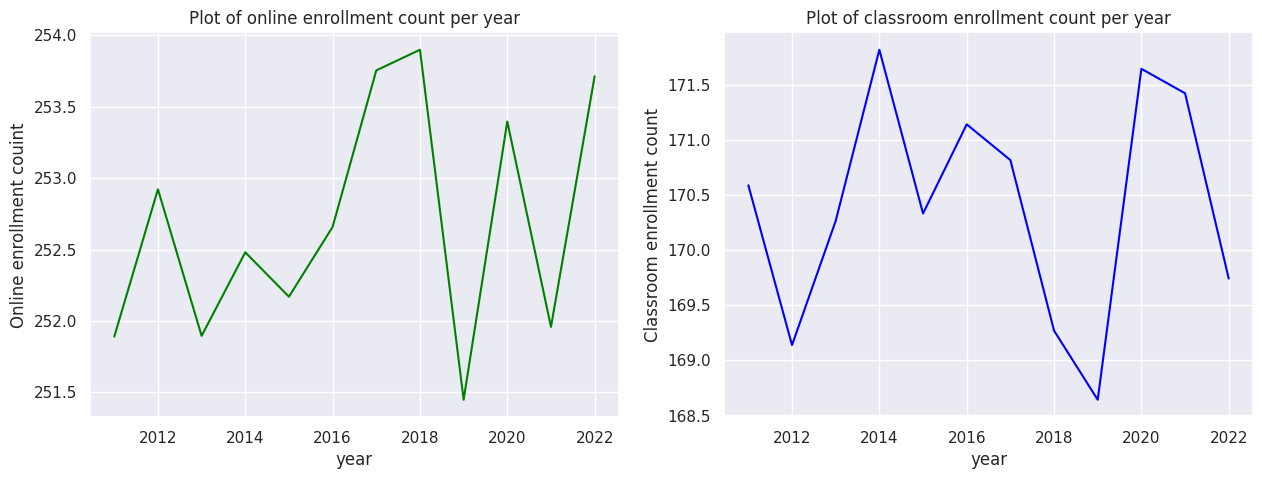

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
online = u_enroll[u_enroll['course_type'] == 'online']
classroom = u_enroll[u_enroll['course_type'] == 'classroom']
sns.lineplot(data= online, y= 'enrollment_count', x= 'year', color= 'green', ax= ax[0], errorbar=None).set(title= 'Plot of online enrollment count per year', ylabel= 'Online enrollment couint')
sns.lineplot(data= classroom, y= 'enrollment_count', x= 'year', color= 'blue', ax= ax[1], errorbar= None).set(title= 'Plot of classroom enrollment count per year', ylabel= 'Classroom enrollment count')

plt.show()

**Class with the most Observation**

_**The Online course has more observation when compared with the classroom hence leading to class in balance**_

course_type
classroom     80954
online       347442
Name: enrollment_count, dtype: int64


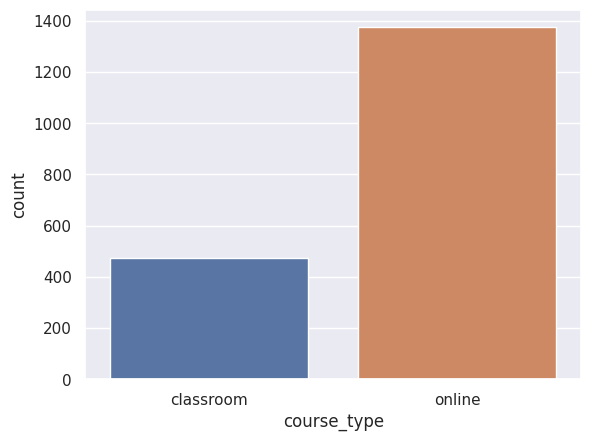

In [52]:
group = u_enroll.groupby('course_type')['enrollment_count'].agg('sum')
print(group)
sns.countplot(x= 'course_type', data= u_enroll)
plt.show()

From **The Relationship between course_type and enrollment_count**, below we can see that online course_type has the largest range of enrollment count and the least number of online enrollment is greater than the highest number of classroom enrollment.

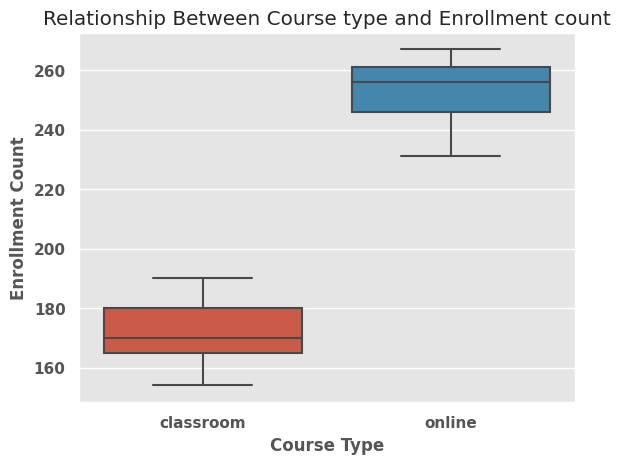

In [53]:
plt.style.use('ggplot')
sns.boxplot(data=u_enroll, x='course_type', y='enrollment_count').set(title= 'Relationship Between Course type and Enrollment count')
plt.xlabel('Course Type',weight='bold')
plt.ylabel('Enrollment Count',weight='bold')
plt.xticks(weight= 'bold')
plt.yticks(weight= 'bold')
plt.show()

The visualization below shows that the average number of **enrollment** is slightly higher in both **online and classroom** course for **None pre_requirements** and the **department** of **Technology** is slightly higher in enrollment count followed by **Engineering**

In [54]:
print(u_enroll.groupby(['course_type', 'pre_requirement'])['enrollment_count'].agg('mean').sort_values())
print('\n')
print(u_enroll.groupby(['course_type', 'department'])['enrollment_count'].agg('mean').sort_values())

course_type  pre_requirement
classroom    Intermediate       162.415205
             Beginner           171.739583
             None               180.419643
online       Intermediate       236.641791
             Beginner           247.422078
             None               258.566110
Name: enrollment_count, dtype: float64


course_type  department 
classroom    Science        163.235955
             Mathematics    172.458333
             Math           172.500000
             Engineering    175.400000
             Technology     176.219512
online       Science        243.251701
             Mathematics    250.104651
             Math           250.674157
             Engineering    256.808511
             Technology     257.689168
Name: enrollment_count, dtype: float64


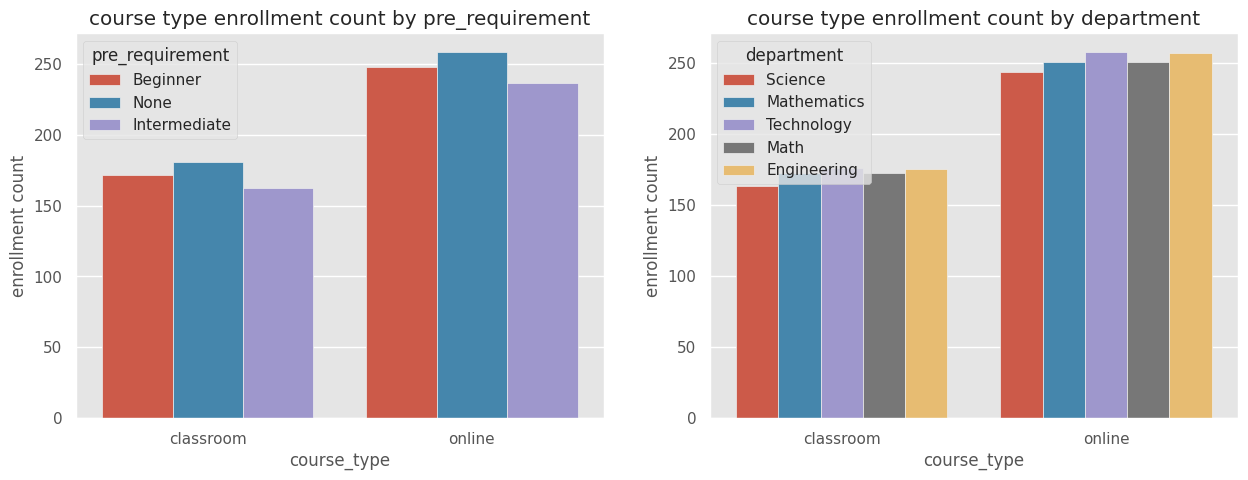

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(data= u_enroll, y= 'enrollment_count', x= 'course_type', hue= 'pre_requirement', ax= axes[0], errorbar =None).set(title= 'course type enrollment count by pre_requirement', ylabel= 'enrollment count')
sns.barplot(data= u_enroll, y= 'enrollment_count', x= 'course_type', hue= 'department', ax= axes[1], errorbar = None).set(title= 'course type enrollment count by department', ylabel= 'enrollment count')


plt.show()

## **Relationships between Numerical Variables**

the heatmap below shows that theres no correlation between the Enrollment count and the numerical variable. to visualize this further we plotted a scatterplot of the numerial variables below

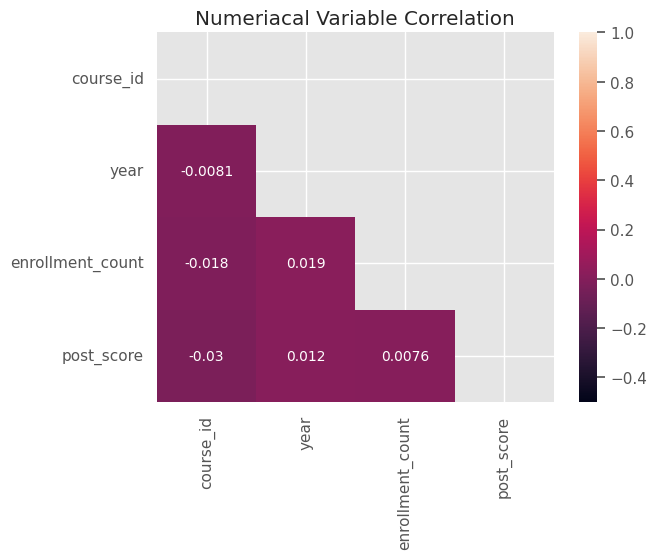

In [67]:
sns.heatmap(u_enroll.corr(), annot=True, vmin= -0.5, vmax= 1, mask=np.triu(np.ones_like(u_enroll.corr()))).set(title='Numeriacal Variable Correlation')
warnings.filterwarnings('ignore')
plt.show()

## **Model Evaluation**

Predicting how many students that will enroll in a course is a regression problem. The following steps where taken before trainig of the model:
- Numerical variables are converted to Categorical Variables
- Nomalization of numerical features
- Converted categorical Variables to numerical values
- The data set is splitted into training and testing sets

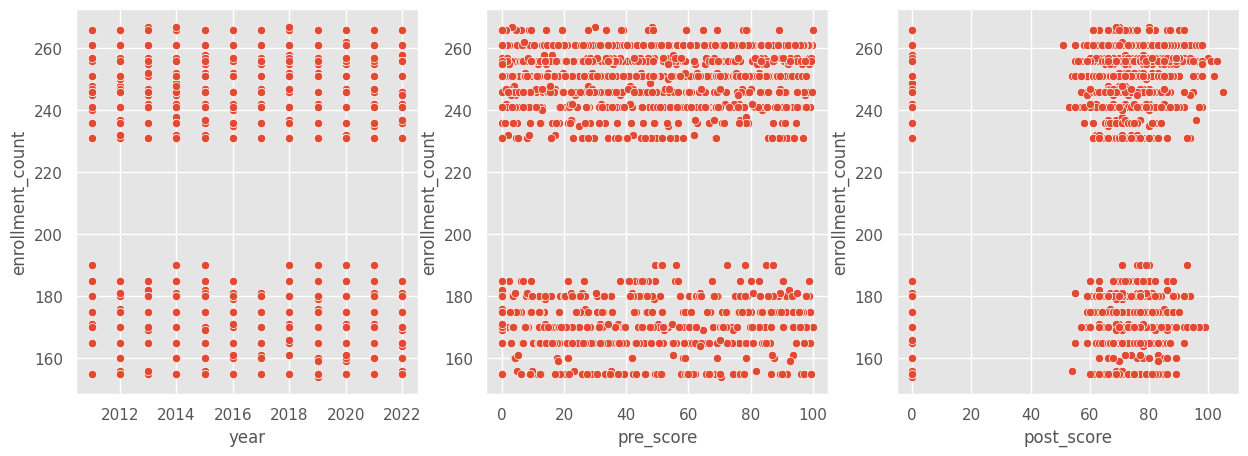

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data= u_enroll, x='year', y= 'enrollment_count', ax=ax[0])
sns.scatterplot(data= u_enroll, y= 'enrollment_count', x='pre_score', ax=ax[1])
sns.scatterplot(data= u_enroll, y= 'enrollment_count', x= 'post_score', ax=ax[2])

plt.show()

In [58]:
u_enroll = u_enroll.drop(columns='course_id') # dropping irrelevant column
features = u_enroll.drop(columns= 'enrollment_count')
#converting Categorical Variables to Numerical variables
X = pd.get_dummies(features, columns= ['course_type', 'pre_requirement', 'department'])

# target variable
y = np.log(u_enroll['enrollment_count'])

**Base Model**

In [59]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, KFold, cross_val_score



scaling = PowerTransformer()
X[['year', 'pre_score', 'post_score']] = scaling.fit_transform(X[['year', 'pre_score', 'post_score']])

#slpit the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 42)

In [60]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r_square = reg.score(X_test, y_test)
#Compute RMSE
rmse = MSE(y_test, y_pred, squared= False)

#Print the metrics
print("R^2 : {}".format(r_square))
print("RMSE : {}".format(rmse))

R^2 : 0.9981526058051393
RMSE : 0.007442935998974545


**From the R^2 score, the features explain approximately 99.8% variance of enrollment count**

### **Feature Importance**

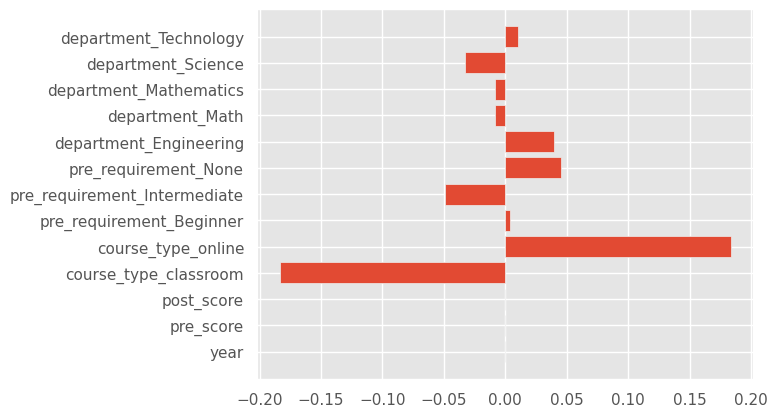

In [61]:
reg_coef = reg.coef_
plt.barh(X.columns, reg_coef)
#plt.xticks(rotation=90)
plt.show()

**Comparism Model**

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
#Decision tree R^2 score
r2 = tree.score(X_test, y_test)
#Root mean square error
RMSE = np.sqrt(MSE(y_pred, y_test))
print("Decision tree R2 score: {}".format(r2))
print('Decision tree RMSE score: {}'.format(RMSE))

Decision tree R2 score: 0.9998631094462276
Decision tree RMSE score: 0.0020260550315101163


**Decision tree feature importance**

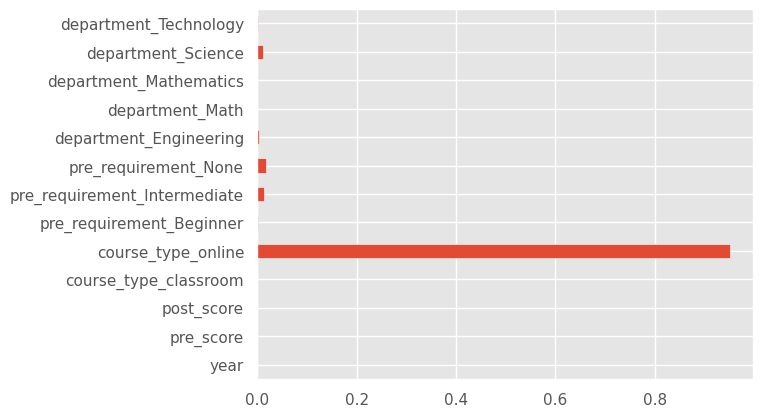

In [63]:
#Computing the feature importance of the Decision tree
importance_dt = pd.Series(tree.feature_importances_, index= X.columns)
importance_dt.plot(kind= 'barh')
plt.show()

I choose LinearRegression as my base model because its efficient to train, interpret and easier to implement, Decision tree Regressor is choosen as my comparism model because since there is no linear relationship between the variables, trees are able to capture non-linear relationships between features and labels.


## **Results**

The scores from R squared of the Linear Regression, and the Decision Tree Regression model is **0.998 and 0.999** respectively, this entails that the Decision Tree Regression model is the best for the features. The Root Mean Squared Error of the Linear Regression, and the Decision Tree Regression model is **0.00744 and 0.0020** respectively, this means that the Decision Tree Regression model error is less in predicting values when compared with the Linear Regression.

- Looking at the bar graph of the feature importance we can infer that the online course type is a major contributor to high enrollment count.